TypeError: 'Quantity' object is not callable

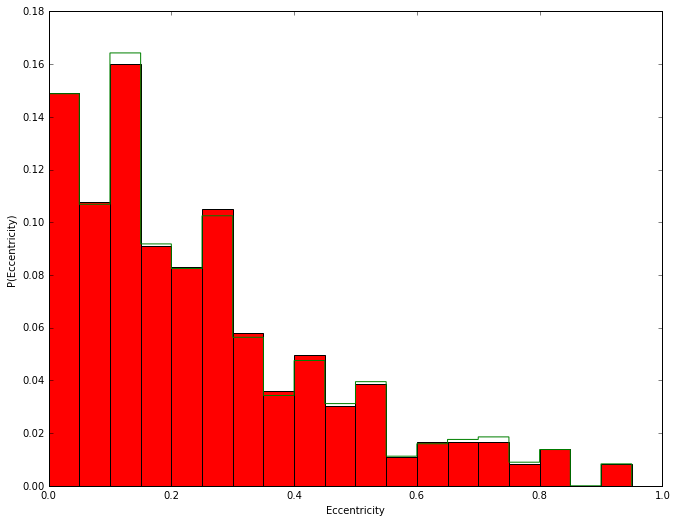

In [21]:
from astropy.table import QTable
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const

%matplotlib inline

# change the data for the kepler data, and graphs below
data = QTable.read('probecc_comma.dat',format='ascii.no_header')


data.rename_column('col1','ecc')
data.rename_column('col2','% in bin')
data.rename_column('col3','cum %')
x = np.arange(0,1,0.05)
y = data['cum %']
ecc_inbin = data['% in bin']
cum=data['cum %']
binwidth = 0.05
fig,ax=plt.subplots(1,1)
fig.set_size_inches(11,8.5)                  

bar = ax.bar(data['ecc'],ecc_inbin,width=0.05,color='r')
ax.set_xlabel('Eccentricity')
ax.set_ylabel('P(Eccentricity)')

n = 1
ecc_list = np.array([])
while n <= 25000:
    r = (np.random.sample(1)) #some y value (percentage)
    #Tracer()()
    if r <= 0.149171270718232:
        bin_lower=0.0
        bin_upper=0.05
    else:
        r_mask = np.where(y<=r)
        x_below = x[r_mask]
        x_below = np.append(x_below,x_below[-1]+0.05)
        bin_upper = x_below[-1]+0.05
        bin_lower = x_below[-2]+0.05
    rand = np.random.uniform(0,0.05,1)
    ecc = bin_lower + rand 
    ecc_list=np.append(ecc_list,ecc)
    n += 1
    continue
ecc_hist = ax.hist(ecc_list,bins=x,weights=np.zeros_like(ecc_list)+1./ecc_list.size,histtype='step',color='green')

# now to generate ICs and their files. 


#calculating masses

def mass(r):
    if r < 2:
        r = r * u.earthRad
        mass = (((r)/const.R_earth)**(3.68))*const.M_earth
        mass = mass.to(u.earthMass)
    else:
        r = r * u.earthRad
        r = r.to(u.cm)
        volume = (4*np.pi*r**3)/3 # assuming volume of sphere?
        density = (1*u.g)/(1*u.cm**3)
        mass = density * volume 
        mass = mass.to(u.earthMass)
    return mass


dRadius = np.random.uniform(0.5,10,25000) # [0.5,10] R_earth; 

for i in dRadius:
    mass = mass(i)


dmass = mass #if radius < 2 R_earth, then mass = ((R/R_earth)**(3.68))*M_earth; if larger, density = 1g/cm**3
dEcc = ecc_list
stellar_mass = np.random.uniform(0.7,1.4,25000) # [0.7,1.4] M_sun
stellar_radius = np.random.uniform(0.7,1.4,25000) #[0.7,1.4] R_sun
dQr = np.array([]) # [30,300]
dQg = np.array([]) # [10**6,10**7]
Qstar = np.random.uniform(10**6,10**7,25000) # [10**6,10**7]
dRotPeriod = np.array([])
semi = np.random.uniform(0.01,0.15,25000) # [0.01,0.15] AU
Ages = np.random.uniform(2*10**9,8*10**9,25000) # [2,8] Gyrs

print (dRadius, dmass.size)

[ 0.99026409] =r 
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19]),) =r_mask(indices) 
 [ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ] bins(last is right edge) 
 20 index of right edge 
    % in bin   
--------------
0.149171270718
0.256906077348
0.417127071823
0.508287292818
0.591160220994
0.696132596685
0.754143646409
0.790055248619
0.839779005525
0.870165745856
0.908839779006
0.919889502762
0.936464088398
0.953038674033
0.969613259669
0.977900552486
0.991712707182
0.991712707182
           1.0
           1.0


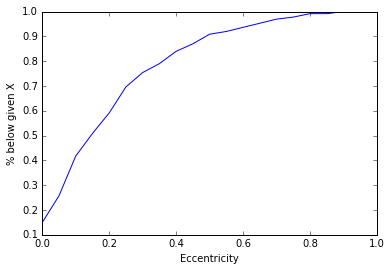

In [5]:

# Sanity check, pick some range of y and spit out x and compare to original 
'''
to create cumdist, need a line where x is 0 to 1 and y is 0 to 1. 
each point is the sum of all the previous points (the third column in the data)
'''
fig,ax=plt.subplots(1,1)
x = np.arange(0,1,0.05)
y = data['cum %']
#y = np.array(y)
ax.plot(x,y,c='blue')
ax.set_xlabel('Eccentricity')
ax.set_ylabel('% below given X')

#sanity check


    
    
r = (np.random.sample(1))
if r >= 0.25 and r <= 0.75:
    r_mask = np.where(y<=r)
else:
    r_mask = np.where(y==y) # doesnt apply any masking, x_below = x
    
x_below = x[r_mask]
x_below = np.append(x_below,x_below[-1]+0.05) # to include the bin in which r belongs
max_index = np.argmax(x_below) 
max_range = x_below[-1]


# now set r = y and find all values of x that are less than that percent
#now add (% in bin) up to b_max, and compare cumsum 
sanity_check = np.cumsum(ecc_inbin[0:max_index+1])
print(r,'=r','\n',r_mask,'=r_mask(indices)','\n',x_below,'bins(last is right edge)','\n',max_index,'index of right edge','\n',sanity_check)

In [133]:
# make 25000 ICs w/ mass, radii, Q, ecc., period and histogram of each; 25 bins per parameter
# in data, the last column is upper bound for the bin, where bin_upper is the next line's eccentricity
    #ex --> first line means 14.9% are below 0.05
#DATA MATCHES!!!!!
#25000 folders
#np.random.uniform() for all except eccentricity.
#import subprocess. 
#size of output files
#output time 1gyr
#eqtide
#ecc + binwidth
    #get bin, then plus random number in binwidth. 

[ 0.45507075  0.11230553  0.27975844 ...,  0.04859791  0.20891135
  0.00838665] (0,)


(array([ 0.13852,  0.10728,  0.14588,  0.09672,  0.08296,  0.09424,
         0.07012,  0.04208,  0.04068,  0.03728,  0.0324 ,  0.02436,
         0.01296,  0.016  ,  0.01528,  0.0146 ,  0.00864,  0.012  ,
         0.00028,  0.00772]),
 array([  1.80591576e-05,   4.75052715e-02,   9.49924839e-02,
          1.42479696e-01,   1.89966909e-01,   2.37454121e-01,
          2.84941333e-01,   3.32428546e-01,   3.79915758e-01,
          4.27402970e-01,   4.74890183e-01,   5.22377395e-01,
          5.69864608e-01,   6.17351820e-01,   6.64839032e-01,
          7.12326245e-01,   7.59813457e-01,   8.07300669e-01,
          8.54787882e-01,   9.02275094e-01,   9.49762307e-01]),
 <a list of 20 Patch objects>)

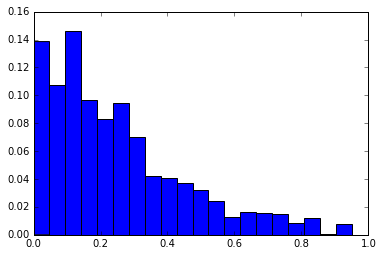

In [8]:
# generate eccentricity distribution mirroring above histogram
from IPython.core.debugger import Tracer
n = 1
ecc_list = np.array([])
while n <= 25000:
    r = (np.random.sample(1)) #some y value (percentage)
    #Tracer()()
    if r <= 0.149171270718232:
        bin_lower=0.0
        bin_upper=0.05
    else:
        r_mask = np.where(y<=r)
        x_below = x[r_mask]
        x_below = np.append(x_below,x_below[-1]+0.05)
        bin_upper = x_below[-1]+0.05
        bin_lower = x_below[-2]+0.05
    rand = np.random.uniform(0,0.05,1)
    ecc = bin_lower + rand 
    ecc_list=np.append(ecc_list,ecc)
    n += 1
    continue
too_big = np.where(x>1)
np.delete(ecc_list,ecc_list[too_big])
print (ecc_list,ecc_list[too_big].shape)
fig,ax = plt.subplots(1,1)
plt.hist(ecc_list,bins=20,weights=np.zeros_like(ecc_list)+1./ecc_list.size)

In [16]:
# now to generate ICs and their files. 
mass = np.array([]) #if radius < 2 R_earth, then mass = ((R/R_earth)**(3.68))*M_earth; if larger, density = 1g/cm**3
ecc = ecc_list
stellar_mass = np.random.uniform(0.7,1.4,25000) # [0.7,1.4] M_sun
stellar_radius = np.random.uniform(0.7,1.4,25000) #[0.7,1.4] R_sun
radius = np.random.uniform(0.5,10,25000) # [0.5,10] R_earth;  
Qr = np.array([]) # [30,300]
Qg = np.array([]) # [10**6,10**7]
Qstar = np.random.uniform(10**6,10**7,25000) # [10**6,10**7]
Period = np.array([])
semi = np.random.uniform(0.01,0.15,25000) # [0.01,0.15] AU
Ages = np.random.uniform(2*10**9,8*10**9,25000) # [2,8] Gyrs

#calculating masses
print (radius)
def calc_mass(radius):
    if radius < 2

[ 2.67414298  1.85328223  7.23425926 ...,  8.68414268  4.893462    3.09955166]


In [15]:
#what do i need for simulations: b.in, star.in, vpl.in. only running eqtide, so only eqtide params. Check gl581 to get defined list? 
'''
b.in: Physical Properties
'''

'\nb.in: Physical Properties\n'

In [43]:
dRadius = np.random.uniform(0.5,10,25000)
def calc_mass(radius):
    for r in radius:
        if r < 2:
            r = r *u.earthRad
            mass = ((r/const.R_earth)**(3.68))*const.M_earth
            return mass
        else:
            r = r * u.earthRad
            r = r.to(u.cm)
            volume = (4*np.pi*r**3)/3
            density = (1*u.g)/(1*u.cm)**3
            mass = volume * density
            return mass

dRadius = np.ndarray.tolist(dRadius)
calc_mass(dRadius) 

        
    

<Quantity 1.164582742068493e+29 g>